In [1]:
import sys
import numpy as np
sys.path.append('../../../nn')
from mynn import *
from mydata import *
from datetime import datetime

import matplotlib as mpl 
from matplotlib.lines import Line2D 
# mpl.use('TkAgg')
import matplotlib.pyplot as plt

plt.rc("figure", dpi=300)           # High-quality figure ("dots-per-inch")
plt.rc("text", usetex=True)         # Crisp axis ticks
plt.rc("font", family="serif")      # Crisp axis labels
plt.rc("legend", edgecolor='none')  # No boxes around legends

plt.rc("figure",facecolor="#ffffff")
plt.rc("axes",facecolor="#ffffff",edgecolor="#000000",labelcolor="#000000")
plt.rc("savefig",facecolor="#ffffff")
plt.rc("text",color="#000000")
plt.rc("xtick",color="#000000")
plt.rc("ytick",color="#000000")

color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def colnorm(u):
	return np.sqrt(np.sum(u**2,0))


print("Here")
M = 20000
N_theta=100
prefix = "../../../data/"
theta = np.load(prefix+"Random_UnitCell_theta_" + str(N_theta) + ".npy")   
K = np.load(prefix+"Random_UnitCell_sigma_" + str(N_theta) + ".npy")
cs = np.load(prefix+"Random_UnitCell_Fn_" + str(N_theta) + ".npy")


acc = 0.999

inputs  = cs
outputs = K

compute_input_PCA = True

if compute_input_PCA:
    train_inputs = inputs[:,:M//2]
    test_inputs  = inputs[:,M//2:M]
    Ui,Si,Vi = np.linalg.svd(train_inputs)
    en_f= 1 - np.cumsum(Si)/np.sum(Si)
    r_f = np.argwhere(en_f<(1-acc))[0,0]
    # r_f = min(r_f, 512)

    r_f = 21

    Uf = Ui[:,:r_f]
    f_hat = np.matmul(Uf.T,train_inputs)
    x_train = torch.from_numpy(f_hat.T.astype(np.float32))
else:
    
    train_inputs =  theta[:M//2, :]
    test_inputs  = theta[M//2:M, :]
    r_f = N_theta
    x_train = torch.from_numpy(train_inputs.astype(np.float32))
    


train_outputs = outputs[:,:M//2] 
test_outputs  = outputs[:,M//2:M] 
Uo,So,Vo = np.linalg.svd(train_outputs)
en_g = 1 - np.cumsum(So)/np.sum(So)
r_g = 4
Ug = Uo[:,:r_g]
g_hat = np.matmul(Ug.T,train_outputs)
y_train = torch.from_numpy(g_hat.T.astype(np.float32))


np.save("PCA_data.npy", Ug)

Here


## Use Julia for plotting

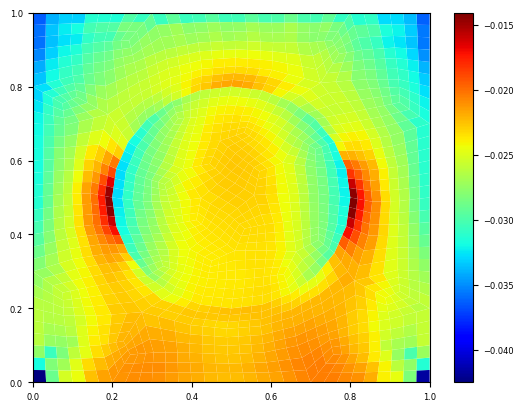

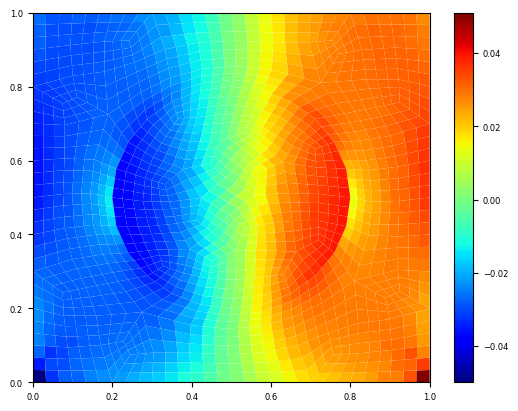

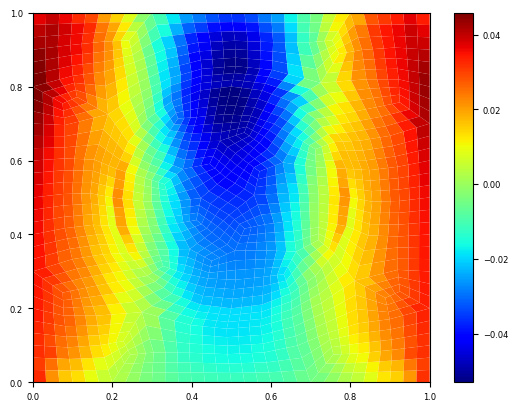

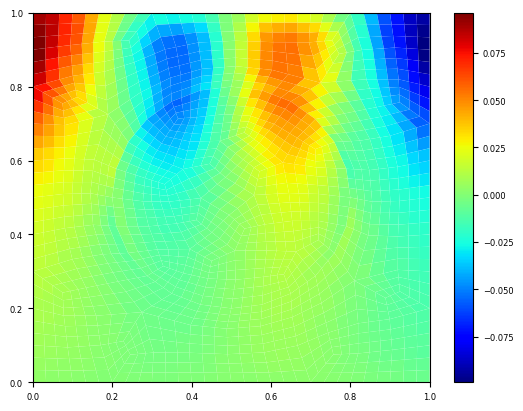

┌ Warning: Jobs are not finished!!! Users need to compute EBC, g, NBC, f.
└ @ NNFEM /home/dzhuang/Code/NNFEM.jl/src/utils/io.jl:231


In [1]:
using NPZ
using LinearAlgebra
using PyPlot
include("../../../plotdefaults.jl")

using Random, Distributions
include("../../src/PlatePull.jl")


outputs = npzread("PCA_data.npy")
problem = "Solid"
    

porder = 2
θ = rand(Normal(0, 1.0), 100);
filename = "../../src/square-circle-coarse-o2"
domain, Fn = ConstructDomain(porder, θ, filename)
ngp = Int64(sqrt(length(domain.elements[1].weights)))


for i = 1:4 

    fig, ax = PyPlot.subplots()
    visσ(domain, ngp, σ=outputs[:, i], ax = ax, mycolorbar=true)
    fig.savefig(problem*"PCA-"*string(i)*".png")

end 
